In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

In [2]:
from matplotlib import rcParams, rc
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rc('text', usetex = False)

In [3]:
df = pd.read_csv("../expression_DB/source/CM334.tissue.avg.tsv", sep = '\t', index_col=0)

In [4]:
df.head()

,RT-1,RT-2,RT-3,ST-1,ST-2,ST-3,LF-2,LF-3,LF-4,FL-1,...,PLB,PLB5,PLB10,PR1,PR2,PR3,PRMG,PRB,PRB5,PRB10
GeneID,,,,,,,,,,,,,,,,,,,,,
CA.PGAv.1.6.scaffold567.122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CA.PGAv.1.6.scaffold567.119,1.056033,0.921266,0.000000,0.994959,1.663456,1.117013,1.072127,0.620696,0.000000,2.422336,...,0.284406,0.907204,1.174636,0.366215,0.170385,0.270422,0.000000,0.714397,0.414834,0.892795
CA.PGAv.1.6.scaffold567.113,4.406164,4.482120,4.672648,0.194966,1.258951,0.307248,8.165098,6.183949,9.981549,5.842792,...,9.655910,15.577277,21.685297,1.128518,1.211198,1.282617,4.001771,8.658124,12.234593,33.616129
CA.PGAv.1.6.scaffold567.112,113.063255,0.000000,0.000000,70.716591,104.151482,102.997787,0.000000,19.312611,36.416290,41.693913,...,53.856229,0.000000,48.135394,25.325151,10.826745,27.432467,47.550053,24.066879,35.957816,17.162675
CA.PGAv.1.6.scaffold567.111,48.618408,43.831924,111.689499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.901825,...,12.934001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
target_gene = ["CA.PGAv.1.6.scaffold1021.30"]

In [6]:
list(df.loc[target_gene[0], :])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.699486,
 0.0,
 0.0,
 0.0,
 17.454288,
 13.006941,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10.971086,
 0.0,
 0.0,
 307.546844,
 93.832092,
 206.777603,
 329.380188,
 416.105804,
 762.607178,
 1377.749146,
 1361.528442,
 1259.37915,
 1585.113037,
 1456.278442,
 1924.085327,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.037044,
 0.0,
 6.840306,
 236.455887,
 158.305603,
 424.660767,
 851.603455,
 551.719788,
 1070.290161,
 1532.411255,
 1570.78479,
 1243.932739,
 3018.898438,
 2388.957031,
 2362.770264,
 0.0,
 0.5664953333333334,
 0.0,
 15.230614499999998,
 0.0,
 0.0,
 3.6570286666666663,
 202.71884633333332,
 502.6977233333333,
 1332.8855793333332,
 1655.1589353333331,
 0.0,
 0.0,
 4.625783333333334,
 273.1407523333333,
 824.5378013333333,
 1449.0429279999998,
 2590.2085776666668]

In [7]:
color_table_CM334 = {"root": "#F6EAC2", "stem":"#CBAACB", 
               "leaf":"#CBAACB", "flower":"#FFE1E8", 
               "placenta1":"#FFC8A2", "placenta2":"#FFC8A2","placenta3":"#FFC8A2",
               "placentaMG":"#FFC8A2", "placentaB":"#FFC8A2", "placentaB5":"#FFC8A2", "placentaB10":"#FFC8A2", 
               "pericarp1":"#FF968A", "pericarp2":"#FF968A", "pericarp3":"#FF968A", 
               "pericarpMG":"#FF968A", "pericarpB":"#FF968A", "pericarpB5":"#FF968A", "pericarpB10":"#FF968A", 
              
              }

In [8]:
# columns = ["RT", "ST", "LF", "FL", "PL", "PLB", "PR", "PRB"]
# columns = ["RT", "ST", "LF", "BU", "FL", "FR1", "FR2", "FR3", "FR4", "FR5", "FRB", "FRB3", "FRB5", "FRB7"]
columns = ["RT", "ST", "LF", "FL", "PL1", "PL2", "PL3", "PLMG", "PLB", "PLB5", "PLB10", "PR1", "PR2", "PR3", "PRMG", "PRB", "PRB5", "PRB10"]

In [9]:
df.columns

Index(['RT-1', 'RT-2', 'RT-3', 'ST-1', 'ST-2', 'ST-3', 'LF-2', 'LF-3', 'LF-4',
       'FL-1', 'FL-2', 'PL1-1', 'PL1-2', 'PL1-3', 'PL2-1', 'PL2-2', 'PL2-3',
       'PL3-1', 'PL3-2', 'PL3-3', 'PLMG-1', 'PLMG-2', 'PLMG-3', 'PLB-1',
       'PLB-2', 'PLB-3', 'PLB5-1', 'PLB5-2', 'PLB5-3', 'PLB10-1', 'PLB10-2',
       'PLB10-3', 'PR1-1', 'PR1-2', 'PR1-3', 'PR2-1', 'PR2-2', 'PR2-3',
       'PR3-1', 'PR3-2', 'PR3-3', 'PRMG-1', 'PRMG-2', 'PRMG-3', 'PRB-1',
       'PRB-2', 'PRB-3', 'PRB5-1', 'PRB5-2', 'PRB5-3', 'PRB10-1', 'PRB10-2',
       'PRB10-3', 'RT', 'ST', 'LF', 'FL', 'PL1', 'PL2', 'PL3', 'PLMG', 'PLB',
       'PLB5', 'PLB10', 'PR1', 'PR2', 'PR3', 'PRMG', 'PRB', 'PRB5', 'PRB10'],
      dtype='object')

In [10]:
avgdf = df[columns]
stddf = df[[c for c in df.columns if c not in columns]]

std = []

for col in columns:
    print(col)
    std.append(np.std([stddf.loc[target_gene[0], temp] for temp in stddf.columns if col == temp[:len(col)] and temp[len(col)] == "-" ]))


RT
ST
LF
FL
PL1
PL2
PL3
PLMG
PLB
PLB5
PLB10
PR1
PR2
PR3
PRMG
PRB
PRB5
PRB10


In [11]:
std

[0.0,
 0.8011453834210672,
 0.0,
 2.2236734999999994,
 0.0,
 0.0,
 5.171819538387196,
 87.2958721241151,
 187.16307788750768,
 52.397036650089014,
 197.2995038316849,
 0.0,
 0.0,
 3.2719087238052484,
 111.79028835505743,
 212.56876557111696,
 145.87842945597046,
 303.31796732794857]

```
CaCM334 = "#b9CEAC"
CB = "#FFA23A"
CC = "FF5C77"
```

```python
plt.figure(figsize=(30, 30))

# color_code = [color_table_CM334[col] for col in df.columns]
color_code = ["#B9CEAC" for col in df.columns]

ax1 = plt.subplot(3, 1, 1)

yticks = [10000, 20000, 30000, 40000]
for val in yticks:
    plt.axhCapana06g000615ine(val, color = "grey")
plt.bar(df.columns, df.loc[target_gene[0], :], color = color_code, edgecolor = 'white')
plt.xticks(df.columns, rotation = 50, fontsize = 40,  horizontalalignment="center", visible = False)
plt.yticks(yticks, fontsize = 40)
plt.title('CaCCS2', fontsize = 50)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
ax1.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().margins(y= 0)

ax2 = plt.subplot(3, 1, 2, sharex = ax1)
yticks = [500, 1000, 1500]
for val in yticks:
    plt.axhline(val, color = "grey")

plt.bar(df.columns, df.loc[target_gene[1], :], color = color_code, edgecolor = 'white')
plt.yticks(yticks, fontsize = 40)
plt.xticks(df.columns, rotation = 50, fontsize = 40,  horizontalalignment="center", visible = False)
plt.title(target_gene[1], fontsize = 50)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
ax2.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().margins(y= 0)

ax2 = plt.subplot(3, 1, 3, sharex = ax1)
yticks = [10, 20, 30, 40, 50]
for val in yticks:
    plt.axhline(val, color = "grey")

plt.bar(df.columns, df.loc[target_gene[2], :], color = color_code, edgecolor = 'white')
plt.yticks(yticks, fontsize = 40)
plt.xticks(df.columns, rotation = 50, fontsize = 40,  horizontalalignment="center")
plt.title(target_gene[2], fontsize = 50)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
ax2.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().margins(y= 0)


plt.savefig("CaCCS_CaDIV1_unknown_.png", bbox_inches = "tight")
plt.show()
```

#### CaCCS_DIVARICATA

```python
plt.figure(figsize=(30, 30))

# color_code = [color_table_CM334[col] for col in df.columns]
color_code = ["#B9CEAC" for col in df.columns]

ax1 = plt.subplot(2, 1, 1)

yticks = [5000, 10000, 15000]
for val in yticks:
    plt.axhline(val, color = "grey")
plt.bar(df.columns, df.loc[target_gene[0], :], color = color_code, edgecolor = 'white')
plt.xticks(df.columns, rotation = 50, fontsize = 40,  horizontalalignment="center", visible = False)
plt.yticks(yticks, fontsize = 45)
plt.title('CaCCS2', fontsize = 50)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
ax1.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().margins(y= 0)

ax2 = plt.subplot(2, 1, 2, sharex = ax1)
yticks = [200, 400, 600]
for val in yticks:
    plt.axhline(val, color = "grey")

plt.bar(df.columns, df.loc[target_gene[1], :], color = color_code, edgecolor = 'white')
plt.yticks(yticks, fontsize = 45)
plt.xticks(df.columns, rotation = 50, fontsize = 45,  horizontalalignment="center")
plt.title(target_gene[1], fontsize = 50)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
ax2.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().margins(y= 0)



"""
ax2 = plt.subplot(3, 1, 3, sharex = ax1)
yticks = [10, 20, 30, 40, 50]
for val in yticks:
    plt.axhline(val, color = "grey")

plt.bar(df.columns, df.loc[target_gene[2], :], color = color_code, edgecolor = 'white')
plt.yticks(yticks, fontsize = 40)
plt.xticks(df.columns, rotation = 50, fontsize = 40,  horizontalalignment="center")
plt.title(target_gene[2], fontsize = 50)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
ax2.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().margins(y= 0)
"""

plt.savefig("CaCCS_CaDIV1_Zunla-1.png", bbox_inches = "tight")
plt.show()
```

\plt.savefig("color_bar.png")

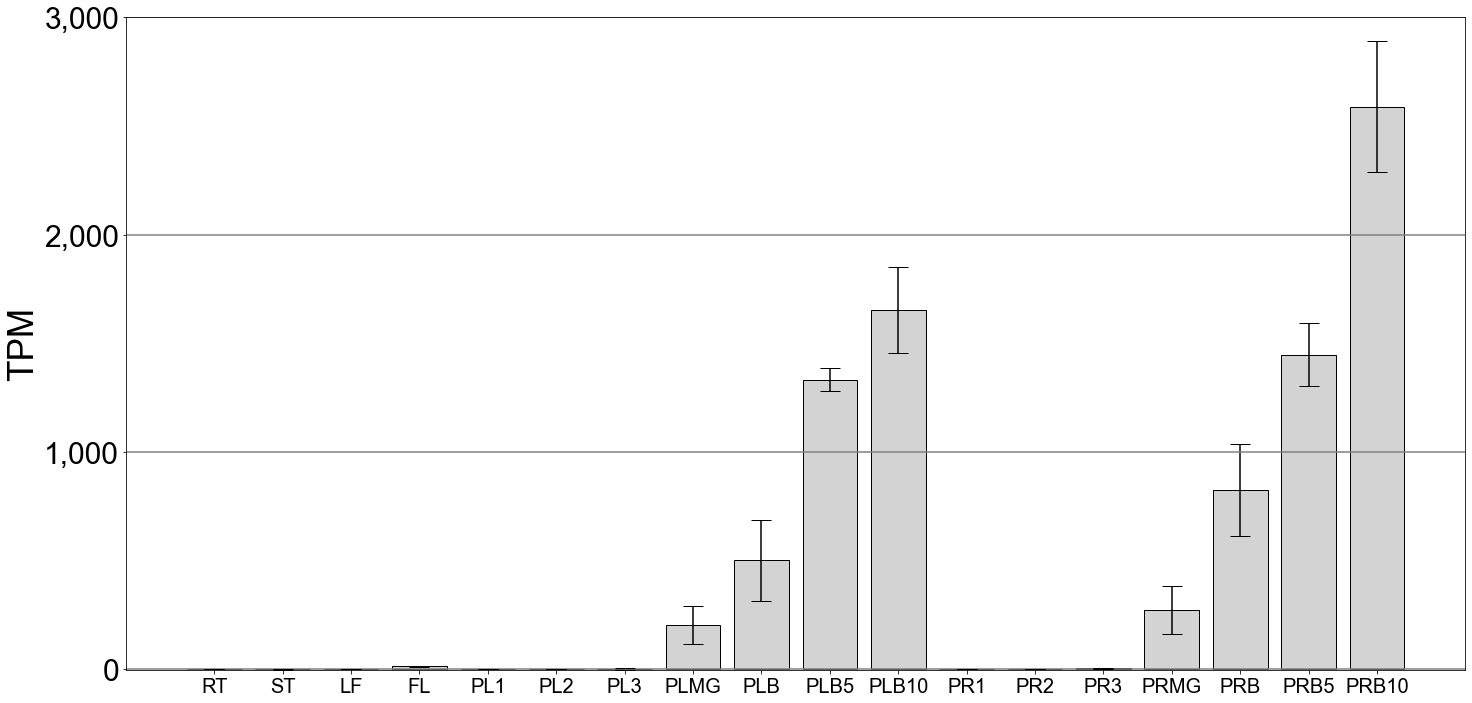

In [13]:
plt.figure(figsize=(24, 12))

# color_code = [color_table_CM334[col] for col in df.columns]
color_code = ["lightgrey" for col in df.columns]


ax1 = plt.subplot(1, 1, 1)

yticks = [0, 1000, 2000, 3000]
for val in yticks:
    plt.axhline(val, color = "grey")
plt.bar(avgdf.columns, avgdf.loc[target_gene[0], :], color = color_code, edgecolor = 'black', yerr = std, capsize = 10)
plt.xticks(avgdf.columns, fontsize = 20,  horizontalalignment="center", visible = True)
plt.yticks(yticks, fontsize = 30)
plt.ylabel("TPM", fontsize = 35)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
ax1.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().margins(y= 0)


"""
ax2 = plt.subplot(2, 1, 2, sharex = ax1)
yticks = [200, 400, 600]
for val in yticks:
    plt.axhline(val, color = "grey")

plt.bar(df.columns, df.loc[target_gene[1], :], color = color_code, edgecolor = 'white')
plt.yticks(yticks, fontsize = 45)
plt.xticks(df.columns, rotation = 50, fontsize = 45,  horizontalalignment="center")
plt.title(target_gene[1], fontsize = 50)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
ax2.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().margins(y= 0)
"""




"""
ax2 = plt.subplot(3, 1, 3, sharex = ax1)
yticks = [10, 20, 30, 40, 50]
for val in yticks:
    plt.axhline(val, color = "grey")

plt.bar(df.columns, df.loc[target_gene[2], :], color = color_code, edgecolor = 'white')
plt.yticks(yticks, fontsize = 40)
plt.xticks(df.columns, rotation = 50, fontsize = 40,  horizontalalignment="center")
plt.title(target_gene[2], fontsize = 50)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
ax2.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().margins(y= 0)
"""

# plt.savefig("CM334.NAGLU3.png", bbox_inches = "tight")
plt.show()